## Import Python Libraries and Modules

In [121]:
#Import python libraries and modules
import pandas as pd
import numpy as np
#Import libraries and modules for vizualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns


#import scit-learn module to split the dataset into train-test sub-datasets
from sklearn.model_selection import train_test_split

## 1. Load Dataset

In [124]:
#Specify what and where is the data file
filename = "C:/Users/Aleena/Desktop/UNT/big data/FINAL PROJECT/car_evaluation.csv"
col_names =['Price','Maintenance','Doors','Passengers','Luggage','Safety','Evaluation']

#Load the data into a Pandas Dataframe
df=pd.read_csv(filename,names=col_names, index_col= False)

In [126]:
df.head()

,Price,Maintenance,Doors,Passengers,Luggage,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# 2. Preprocess Dataset

In [129]:
#Lets Find null values
#Count the number of NAN values in each column
print(df.isnull().sum())

Price          0
Maintenance    0
Doors          0
Passengers     0
Luggage        0
Safety         0
Evaluation     0
dtype: int64


In [131]:
df.shape

(1728, 7)

In [133]:
df.dtypes

Price          object
Maintenance    object
Doors          object
Passengers     object
Luggage        object
Safety         object
Evaluation     object
dtype: object

Here we can see all columns are object but 'Door' and 'Passanger' are of numeric data type

In [136]:
# Count of unique values in 'Doors'
unique_counts = df['Doors'].value_counts()

print(unique_counts)

Doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64


So we have "5more" which mean 5 or more doors with "5" which would mean that the car has 5 or more doors 

In [139]:
# Replace '5more' with '5' in the 'Doors' column
df['Doors'] = df['Doors'].replace('5more', '5')



In [141]:
# Count of unique values in 'Doors'
unique_counts = df['Doors'].value_counts()

print(unique_counts)

Doors
2    432
3    432
4    432
5    432
Name: count, dtype: int64


Now let's look at Passenger column

In [144]:
# Count of unique values in 'Passengers'
unique_counts = df['Passengers'].value_counts()

print(unique_counts)

Passengers
2       576
4       576
more    576
Name: count, dtype: int64


So we have "more" which mean 5 or more passengers with "5" which would mean that the car has 5 or more passengers

In [147]:
df['Passengers'] = df['Passengers'].replace('more', '5')

In [149]:
# Count of unique values in 'Passengers'
unique_counts = df['Passengers'].value_counts()

print(unique_counts)

Passengers
2    576
4    576
5    576
Name: count, dtype: int64


In [151]:
#Let's change the dattype of Doors and Passengers
df['Doors'] = df['Doors'].astype(int)
df['Passengers'] = df['Passengers'].astype(int)

In [153]:
df.dtypes

Price          object
Maintenance    object
Doors           int32
Passengers      int32
Luggage        object
Safety         object
Evaluation     object
dtype: object

In [155]:

# Label encoding for ordinal features (e.g., 'Price', 'Maintenance')
label_columns = ['Price', 'Maintenance', 'Luggage', 'Safety','Evaluation']
label_encoder = LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))





In [157]:
# Save DataFrame to a CSV file
df.to_csv('CarEvaluation_clean.csv', index=False)

## 3. Perform Exploratory Data Analysis on Dataset

In [38]:
# Get the dimensions or Shape of the dataset
# i.e number of records/rows x number of variables/columns
print(df.shape)

(1728, 7)


In [40]:
#Get the data types of all the variables/attributes of the data set
#The results shows
print(df.dtypes)

Price           int32
Maintenance     int32
Doors           int32
Passengers      int32
Luggage         int32
Safety          int32
Evaluation     object
dtype: object


In [42]:
#Get several records/rows at the top of the dataset
#Get the first 5 records
print(df.head(5))

   Price  Maintenance  Doors  Passengers  Luggage  Safety Evaluation
0      3            3      2           2        2       1      unacc
1      3            3      2           2        2       2      unacc
2      3            3      2           2        2       0      unacc
3      3            3      2           2        1       1      unacc
4      3            3      2           2        1       2      unacc


In [44]:
df.Evaluation = pd.Categorical(df.Evaluation)
df['Evaluation'] = df.Evaluation.cat.codes
print(df.dtypes)

Price          int32
Maintenance    int32
Doors          int32
Passengers     int32
Luggage        int32
Safety         int32
Evaluation      int8
dtype: object


In [252]:
df.Maintenance = pd.Categorical(df.Maintenance)
df['Maintenance'] = df.Maintenance.cat.codes

df.Luggage = pd.Categorical(df.Luggage)
df['Luggage'] = df.Luggage.cat.codes

df.Safety = pd.Categorical(df.Safety)
df['Safety'] = df.Safety.cat.codes

df.Evaluation = pd.Categorical(df.Evaluation)
df['Evaluation'] = df.Evaluation.cat.codes

In [254]:
print(df.dtypes)

Price           int8
Maintenance     int8
Doors          int32
Passengers     int32
Luggage         int8
Safety          int8
Evaluation      int8
Cluster        int32
dtype: object


In [191]:
for column in df.columns:
    print(f"Column '{column}':")
    value_counts = df[column].value_counts()
    for value, count in value_counts.items():
        print(f"  {value}: {count}")
    print() 

Column 'Price':
  3: 432
  0: 432
  2: 432
  1: 432

Column 'Maintenance':
  3: 432
  0: 432
  2: 432
  1: 432

Column 'Doors':
  2: 432
  3: 432
  4: 432
  5: 432

Column 'Passengers':
  2: 576
  4: 576
  5: 576

Column 'Luggage':
  2: 576
  1: 576
  0: 576

Column 'Safety':
  1: 576
  2: 576
  0: 576

Column 'Evaluation':
  2: 1210
  0: 384
  1: 69
  3: 65



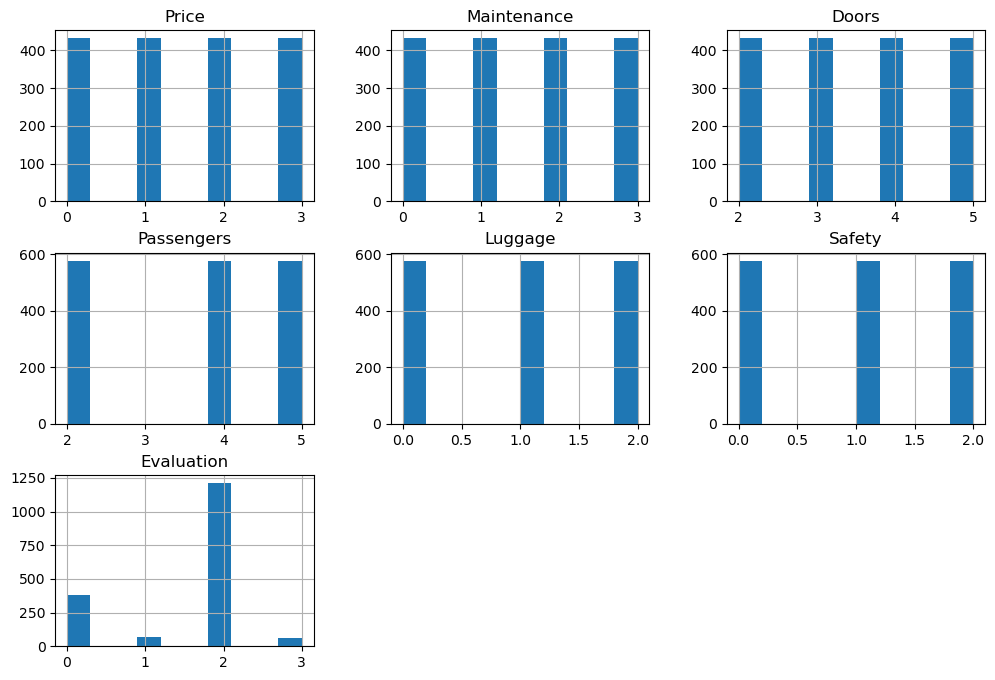

In [50]:
#Plot histograms for each numeric variable/attributr of the dataset
# VIP NOTES: The first variable ID is also plotted. However the plot should be ignored
df.hist(figsize=(12,8))
pyplot.show()

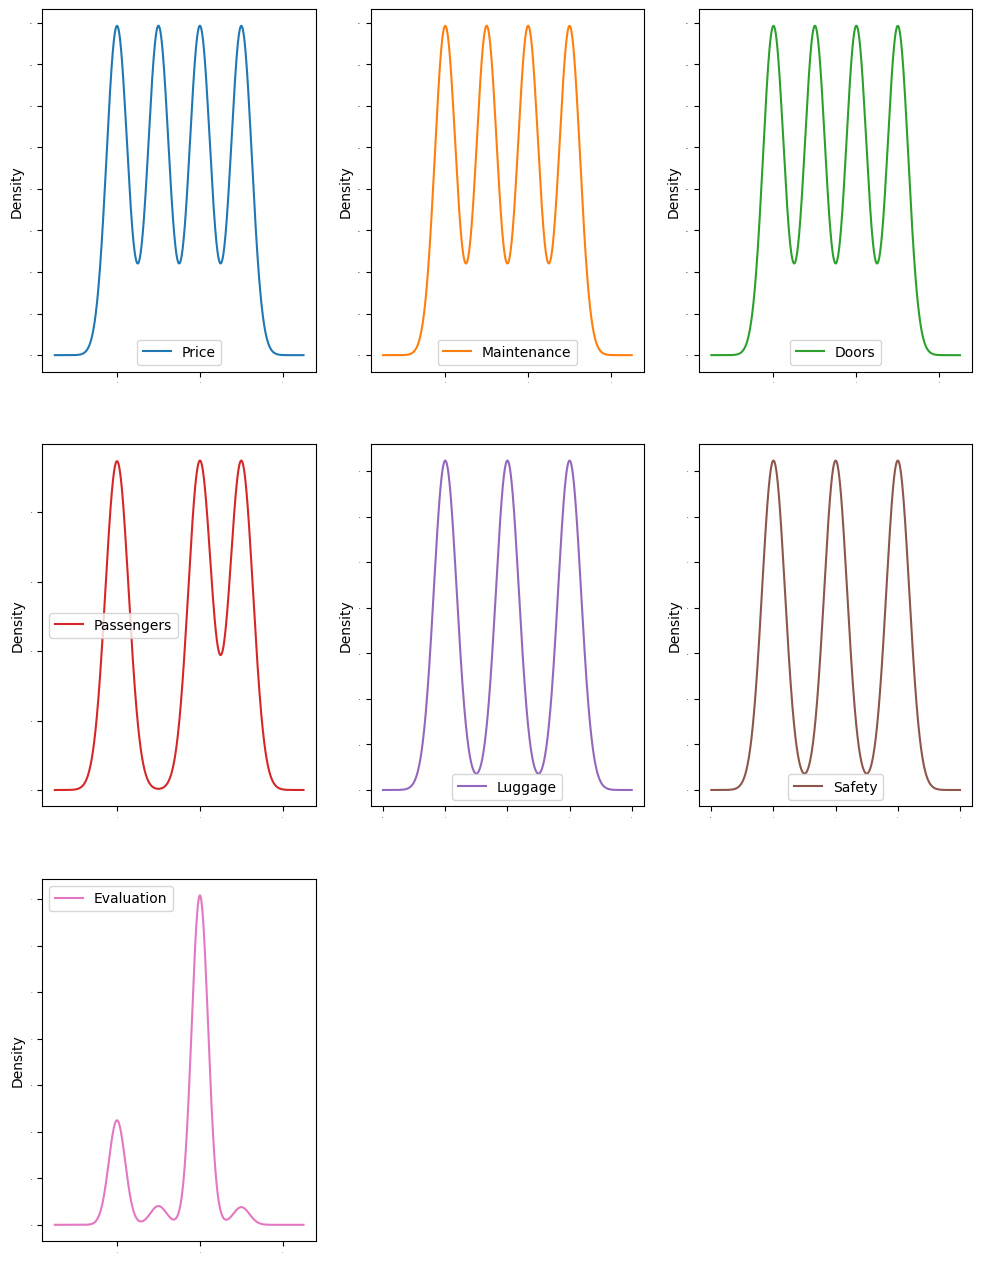

In [52]:
# Density plots
# Important Notes: 5 numeric variables ---> at least 5 plots --> layout(2,3): 2 rows, each ro with 3 plots
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,legend=True,fontsize=1,figsize=(12,16))
pyplot.show()

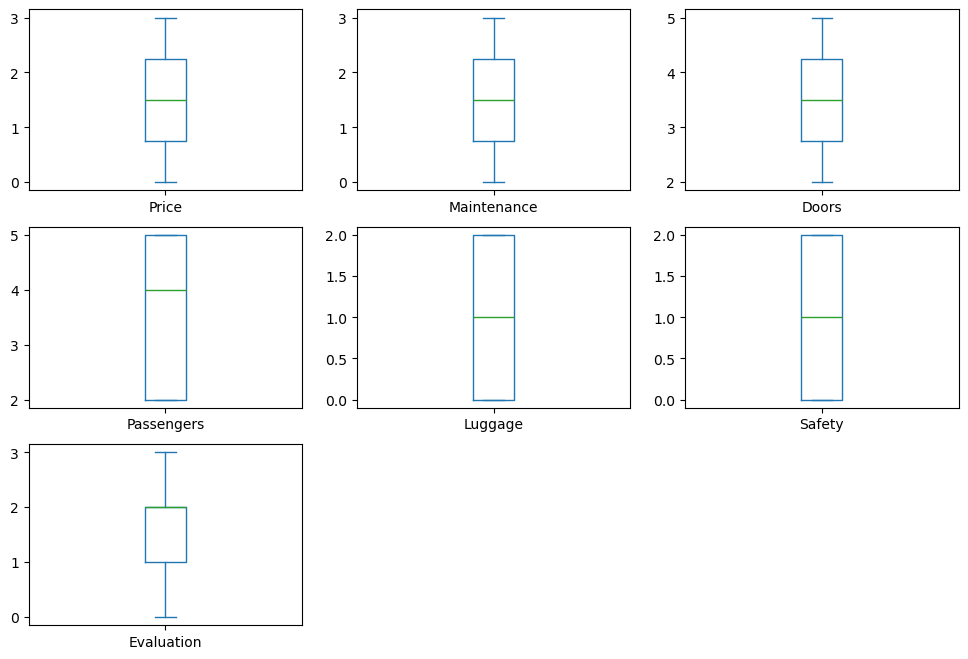

In [54]:
df.plot(kind='box', subplots= True , layout=(3,3),sharex =False, sharey= False, figsize=(12,8))
pyplot.show()

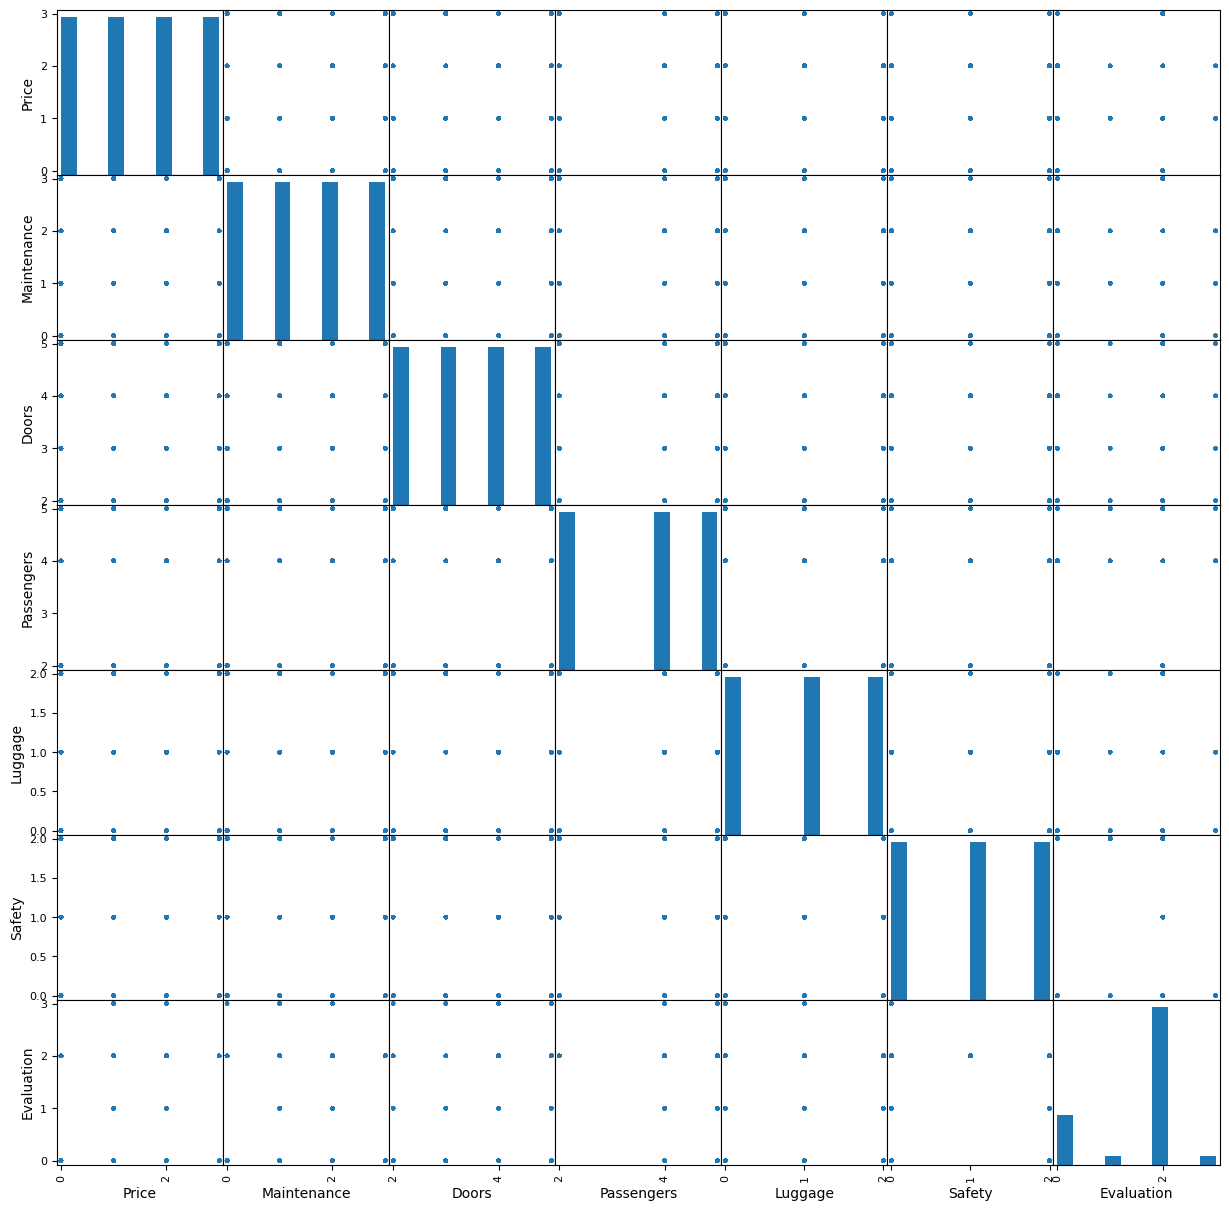

In [56]:
# scatter matrix plot
scatter_matrix(df, alpha =0.8, figsize=(15,15))
pyplot.show()

## 4. Separate Datset into Input and Output Arrays

In [159]:
array = df.values
X = array[:,0:6]
Y = array[:,6]


## 5. Build the Model

In [162]:
#Import scit-learn module for algorithm/module :K-means
from sklearn.cluster import KMeans

In [164]:
# Build the model
model = KMeans(n_clusters=4,random_state=42)

#Train the model using the taining sub-dataset
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [166]:
centroids = model.cluster_centers_
labels = model.labels_
centroids,labels[:10]

(array([[1.5       , 0.33333333, 3.5       , 4.5       , 1.        ,
         1.        ],
        [0.4       , 2.2       , 3.5       , 4.5       , 1.        ,
         1.        ],
        [2.6       , 2.2       , 3.5       , 4.5       , 1.        ,
         1.        ],
        [1.5       , 1.5       , 3.5       , 2.        , 1.        ,
         1.        ]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2]))

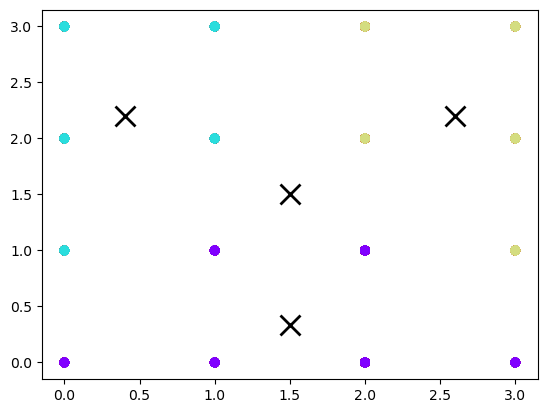

In [168]:
#plot the data points with centroids
pyplot.scatter(X[:,0],X[:,1],c=model.labels_,cmap='rainbow')

lines=pyplot.plot(centroids[0,0],centroids[0,1],'kx')
pyplot.setp(lines,ms=15.0)
pyplot.setp(lines,mew=2.0)

lines=pyplot.plot(centroids[1,0],centroids[1,1],'kx')
pyplot.setp(lines,ms=15.0)
pyplot.setp(lines,mew=2.0)

lines=pyplot.plot(centroids[2,0],centroids[2,1],'kx')
pyplot.setp(lines,ms=15.0)
pyplot.setp(lines,mew=2.0)

lines=pyplot.plot(centroids[3,0],centroids[3,1],'kx')
pyplot.setp(lines,ms=15.0)
pyplot.setp(lines,mew=2.0)



pyplot.show()

1. price: high
2. maintaince : high
3. Doors: 2
4. Passenger: 4
5. luggage :small
6. safety: low

In [176]:
model.predict([[0,0,2,4,2,1]])

array([0])

1. price: vhigh
2. maintaince : high
3. Doors: 4
4. Passenger: 4
5. luggage :small
6. safety: low

In [187]:
model.predict([[3,0,4,4,2,1]])

array([0])